In [1]:
import numpy as np
from squlearn.feature_map.layered_feature_map import LayeredFeatureMap, Layer, LayeredPQC, VariableGroup

In [2]:
x=VariableGroup("x",2)
p=VariableGroup("p")
y=VariableGroup("y")
z=VariableGroup("z")

pqc = LayeredPQC(num_qubits=4,variable_groups=[x,p,y,z])

pqc.H()
pqc.Rz(x)
pqc.crz_entangling(y,ent_strategy="AA")
pqc.crx_entangling(z,ent_strategy="NN")
pqc.cu_entangling(x,y,p,z)

layer = Layer(pqc)
layer.Rx(y)


pqc.add_layer(layer,num_layers=2)

xx = x.get_param_vector()
pp = p.get_param_vector()
yy= y.get_param_vector()
zz= z.get_param_vector()

pqc.get_circuit(xx,pp,yy,zz).draw()





TypeError: LayeredPQC.add_operation() takes 2 positional arguments but 3 were given

In [ ]:
pqc.set_params(num_qubits=5)
xx = x.get_param_vector()
pp = p.get_param_vector()
yy= y.get_param_vector()
zz= z.get_param_vector()

pqc.get_circuit(xx,pp,yy,zz).draw()


In [ ]:
string_feature_map = LayeredFeatureMap.from_string("Ry(p)",
    num_qubits=5,
    num_features=1,
    num_layers=2,
)
string_feature_map.set_params(num_qubits = 8)
string_feature_map.draw()


{'num_qubits': 3, 'num_layers_1': 2, 'num_layers_2': 2, 'num_layers_3': 4}


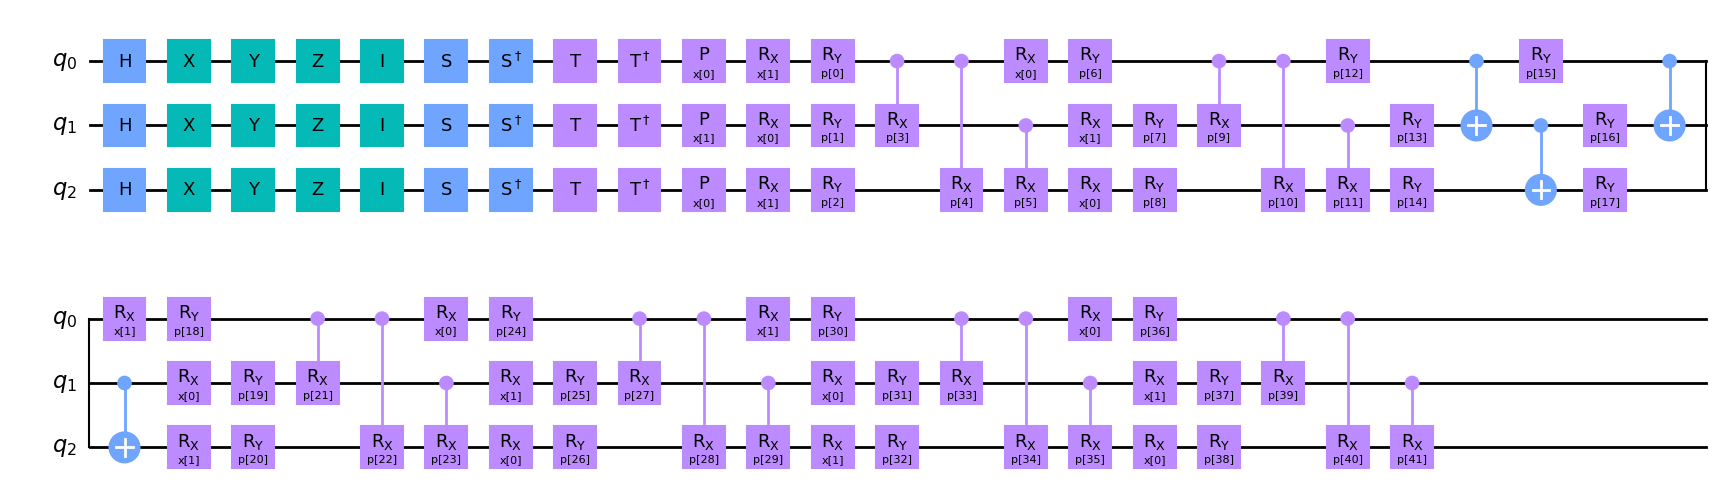

In [1]:
from squlearn.feature_map import LayeredFeatureMap
from squlearn.feature_map.layered_feature_map import Layer
import copy
feature_map = LayeredFeatureMap(num_qubits=4,num_features=2)
feature_map.H()
feature_map.X()
feature_map.Y()
feature_map.Z()
feature_map.I()
feature_map.S()
feature_map.S_conjugate()
feature_map.T()
feature_map.T_conjugate()
feature_map.P("x")


layer = Layer(feature_map)
layer.Rx("x")
layer.Ry("p")
layer.crx_entangling("p",ent_strategy="AA") #später noch cu_entangling mit 4 parametern testen

layer2 = Layer(feature_map)
layer2.Ry("p")
layer2.cx_entangling("NN")

feature_map.add_layer(layer,num_layers=3) # nur damit erhält man bei deepcopy einen fehler aber mit copy allein funktioniert es, vermutlich werden direkt neue variablengruppen in einer deepcopy erstellt.
#feature_map.Ry("p")
feature_map.add_layer(layer2,num_layers=1)
feature_map.add_layer(layer,num_layers=4)
feature_map.set_params(num_qubits = 3)
feature_map.set_params(num_layers_1 = 2)
feature_map.set_params(num_layers_2 = 2)
feature_map.set_params(num_layers_3 = 4)
print(feature_map.get_params())
#print(feature_map.get_params())
feature_map.draw()

hallo
hallo
[<squlearn.feature_map.layered_feature_map._Ry_operation object at 0x000001BE7F7D7940>, <squlearn.feature_map.layered_feature_map._Ry_operation object at 0x000001BE7F7D7A90>]
[<squlearn.feature_map.layered_feature_map._Ry_operation object at 0x000001BE7F7D7940>, <squlearn.feature_map.layered_feature_map._Ry_operation object at 0x000001BE7F7D7A90>, <squlearn.feature_map.layered_feature_map._operation_layer object at 0x000001BE7F52C7F0>]


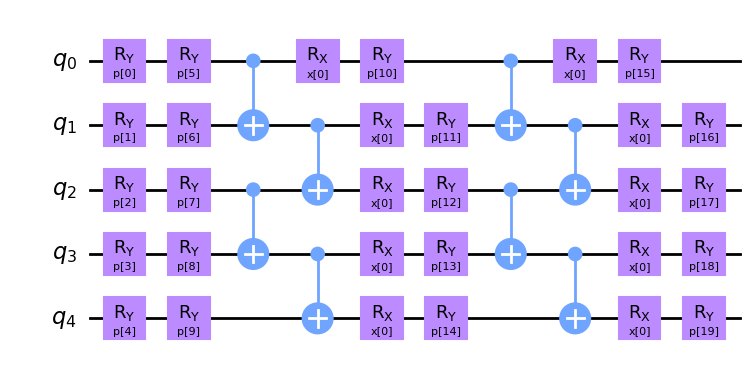

In [ ]:
import numpy as np
from squlearn.feature_map.layered_feature_map import LayeredFeatureMap, Layer, LayeredPQC, VariableGroup
string_feature_map = LayeredFeatureMap.from_string("Ry(p)",
    num_qubits=5,
    num_features=1,
    num_layers=2,
)
#string_feature_map.set_params(num_qubits = 8) #TODO: muss noch für layer geändert werden sowie get_params


layer = Layer(string_feature_map)
layer.cx_entangling("NN")
layer.Rx("x")
layer.Ry("p")
string_feature_map.add_layer(layer,num_layers=2)
string_feature_map.draw()